In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [28]:
cat1_values=[-0.83,-0.15,0.00,0.24,0.02,-0.04,0.31,-0.41,0.14,-0.12,0.13,2.01]
cat2_values=[1.69,0.14,0.02,-1.27,-0.18,-0.14,0.40,-0.37,0.13,0.11,-0.03,-0.21]
cat3_values=[0.06,0.05,-0.01,-1.66,0.56,-0.05,0.56,-0.64,0.14,-0.44,-0.76,1.12]
cat4_values=[-0.17,-0.60,-0.01,-0.45,0.60,0.03,0.87,-0.84,-0.09,-0.77,-1.41,2.05]
cat5_values=[0.23,0.25,-0.01,-1.37,0.43,0.90,0.35,-0.87,-0.43,-0.77,-0.92,1.54]

values=[cat1_values,cat2_values,cat3_values,cat4_values,cat5_values]

cat1=[(-1.65,-0.92),(-0.55,0.10),(-0.01,0.00),(0.09,0.25),(-0.33,0.47),(-0.43,0.41),(0.16,0.93),(-1.20,-0.19),(-0.21,0.52),(-0.38,0.24),(0.14,1.18),(2.65,3.85)]
cat2=[(2.22,3.72),(-0.23,0.44),(0.00,0.02),(-1.74,-1.17),(-0.62,0.16),(-0.61,0.26),(0.22,1.03),(-1.33,-0.28),(-0.14,0.62),(-0.41,0.40),(-0.75,0.21),(-0.42,0.41)]
cat3=[(-0.20,0.67),(-0.27,0.65),(-0.03,0.01),(-3.57,-2.19),(0.36,1.59),(-0.60,0.62),(0.36,1.84),(-1.49,-0.79),(-0.24,0.70),(-1.18,-0.20),(-1.65,-0.97),(1.33,2.87)]
cat4=[(-0.89,-0.15),(-1.51,-0.43),(-0.02,-0.00),(-0.71,-0.45),(0.52,1.28),(-0.35,0.52),(0.95,1.70),(-2.02,-0.81),(-0.55,0.12),(-1.63,-0.71),(-2.89,-2.02),(2.81,3.94)]
cat5=[(0.16,0.86),(-0.08,1.04),(-0.03,0.00),(-2.85,-1.73),(0.31,1.35),(1.00,1.95),(0.08,1.49),(-1.93,-1.12),(-1.42,-0.17),(-1.89,-0.87),(-1.93,-1.19),(2.07,3.30)]

intervals=[cat1,cat2,cat3,cat4,cat5]

In [63]:
def plot_ci_intervals(values, intervals, ax,cat, first=False):
    labelstr = [ 'intercept', 'transition', 'angle', 'distance', 'competition_EURO', 'competition_NBA', 'competition_SLO1',\
                'competition_U14', 'playertype_F', 'playertype_G', 'movement_dribble\n or cut', 'movement_no'  ] 
    
    lower_bound=[i[0] for i in intervals]
    upper_bound=[i[1] for i in intervals]
    xerr=[
        [value-lower for value, lower in zip(values, lower_bound)],
        [upper-value for value, upper in zip(values, upper_bound)],
    ]
    
    inbounds = np.any(np.array(xerr) < 0, axis=0)
    colors = np.where(inbounds, 'red', 'green')
    
    
    
    ax.scatter(values, labelstr, c=colors, s=30, marker='|')
    ax.set_ylim(-0.5, len(labelstr) - 0.5) # add some vertical padding
    ax.set_xticks([])
    
    if not first:
        ax.set_yticks([])
    else:
        ax.tick_params(axis="y", labelsize=20)

    ax.errorbar(values, labelstr, xerr=xerr,
        fmt='none',     # don't connect data points
        ecolor='black', # color of error lines
        elinewidth=1,   # width of error lines
        capsize=4,      # length of error caps
        zorder=-1,      # put error bars behind scatter points
    )

    for value, lower, upper, label, color in zip(values, lower_bound, upper_bound, labelstr, colors):
        shared = dict(xy=(value, label), color=color, textcoords='offset points', ha='center')
        ax.annotate(value, xytext=(0, 5), va='bottom', **shared, fontsize=13)
        ax.annotate(f'[{lower}, {upper}]', xytext=(0, -5), va='top', **shared, fontsize=13)
        
    ax.set_title(cat, fontsize=15, bbox={'facecolor':'0.9', 'pad':5})
    #plt.show()

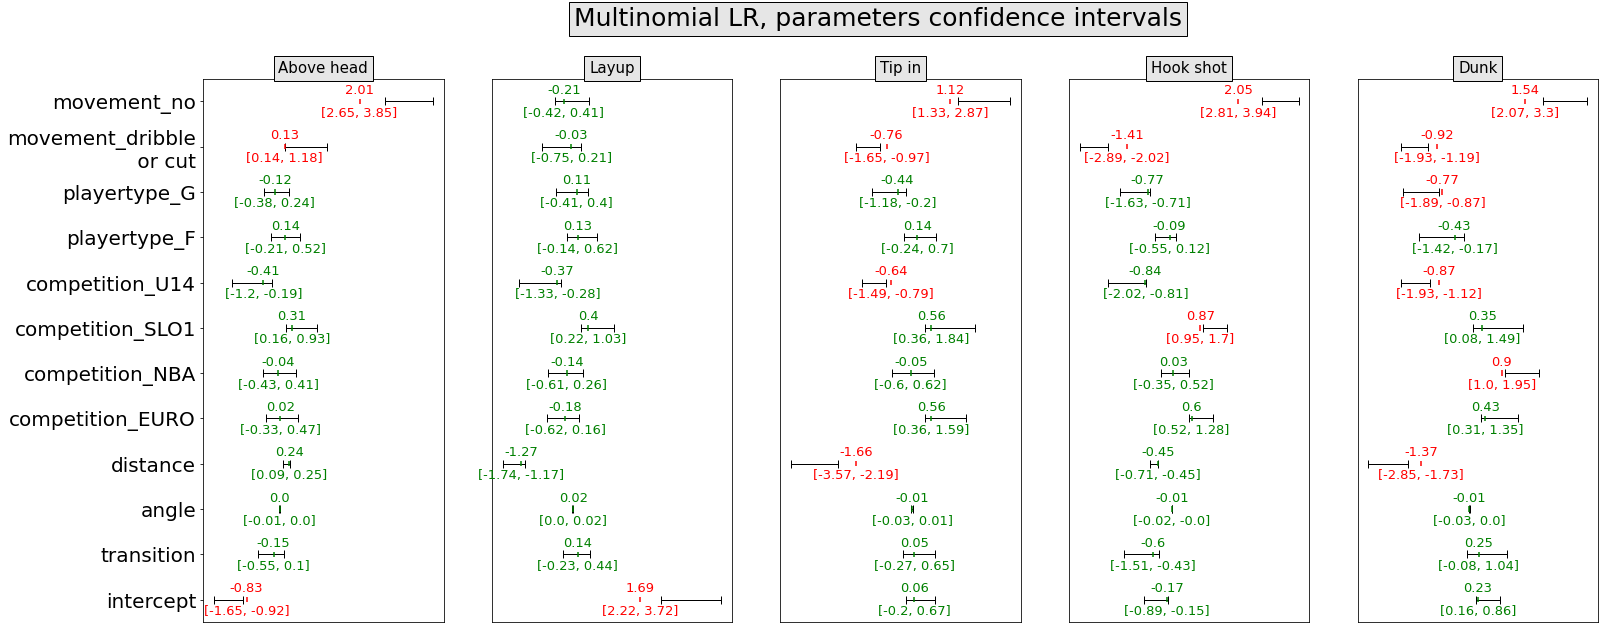

In [65]:
fig, ax = plt.subplots(1,5,figsize=(25,10))
i=0
categories=['Above head', 'Layup', 'Tip in', 'Hook shot','Dunk']
for value, interval,cat in zip(values, intervals, categories):
    if i==0:
        plot_ci_intervals(value, interval, ax[i],cat, True)
    else:
        plot_ci_intervals(value, interval, ax[i],cat)
    i+=1
fig.suptitle('Multinomial LR, parameters confidence intervals', fontsize=25, bbox={'facecolor':'0.9', 'pad':5})
plt.show()